In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

2023-08-14 10:22:11.669783: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-14 10:22:11.698558: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 10:22:12.129988: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Loading the dataset

mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

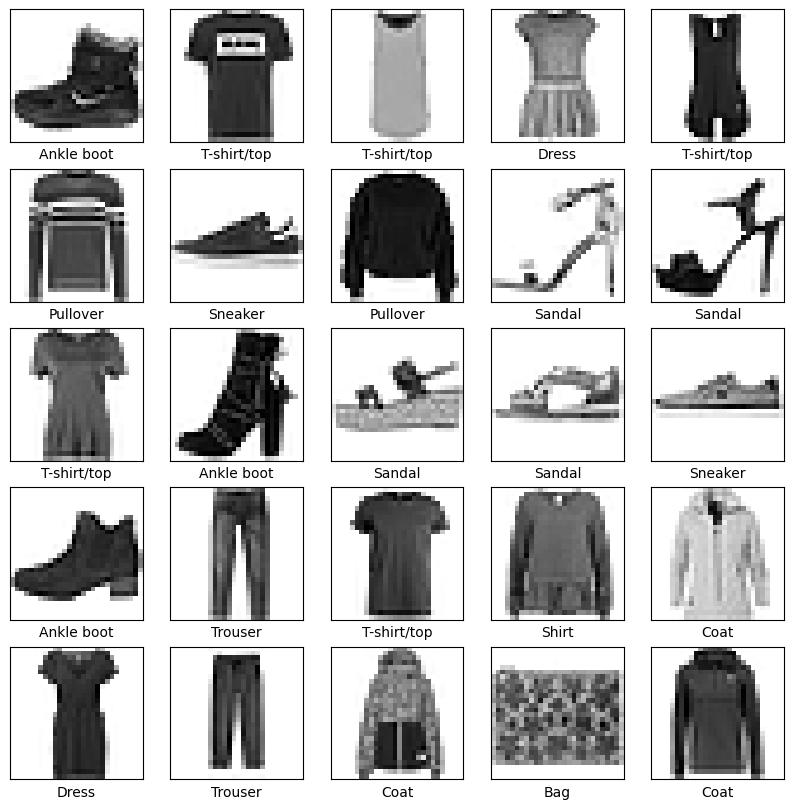

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [5]:
# Building a Fully Connect Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2023-08-14 10:22:13.511534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-14 10:22:13.527142: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-14 10:22:13.527279: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2023-08-14 10:22:14.882358: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f6078544cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-14 10:22:14.882385: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-08-14 10:22:14.885947: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-14 10:22:14.977144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-14 10:22:15.049672: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4994 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3762 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3385 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2951 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2711 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2589 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2396 - accurac

In [7]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3337 - accuracy: 0.8825 - 332ms/epoch - 1ms/step

Test accuracy: 0.8824999928474426


In [8]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
# CNN 1
model = Sequential([
    layers.Conv2D(32, (5, 5),strides = (1,1), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(strides = 2), 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
history1 = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=10
)

Epoch 1/10
235/235 [==============================] - 2s 4ms/step - loss: 0.5347 - accuracy: 0.8144
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3507 - accuracy: 0.8766
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3087 - accuracy: 0.8920
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2766 - accuracy: 0.9028
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2532 - accuracy: 0.9095
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2347 - accuracy: 0.9162
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2182 - accuracy: 0.9216
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2061 - accuracy: 0.9253
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1905 - accuracy: 0.9308
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1794 - accuracy: 0.9354

In [12]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2673 - accuracy: 0.9065 - 641ms/epoch - 2ms/step

Test accuracy: 0.906499981880188


In [13]:
# CNN 2
model = Sequential([
    layers.Conv2D(32, (5, 5),strides = (1,1), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (5, 5),strides = (1,1), activation='relu'),
    layers.MaxPooling2D(strides = 2), 
    layers.Flatten(),
    layers.Dense(150, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
history2 = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=10
)

Epoch 1/10
235/235 [==============================] - 4s 10ms/step - loss: 0.6445 - accuracy: 0.7680
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.3670 - accuracy: 0.8697
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.3110 - accuracy: 0.8871
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2795 - accuracy: 0.8984
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.2491 - accuracy: 0.9090
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2269 - accuracy: 0.9171
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.2078 - accuracy: 0.9240
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1881 - accuracy: 0.9302
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1740 - accuracy: 0.9362
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1580 - accuracy: 0

In [16]:
test_loss, test_acc = model.evaluate(x_test,  y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2611 - accuracy: 0.9086


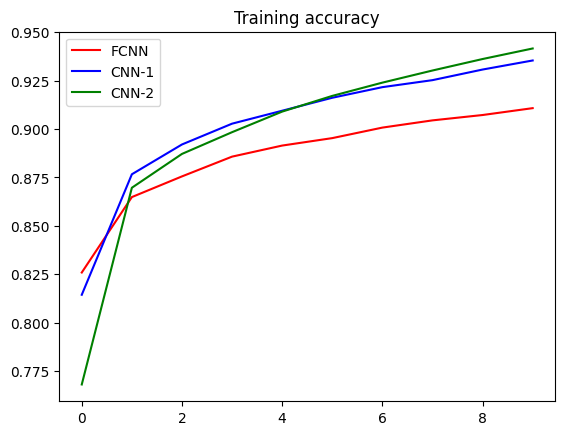

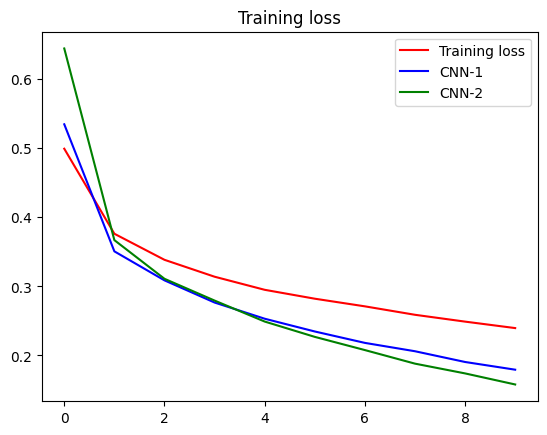

In [18]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))

accuracy_1 = history1.history['accuracy']
loss_1 = history1.history['loss']
epochs_1 = range(len(accuracy_1))

accuracy_2 = history2.history['accuracy']
loss_2 = history2.history['loss']
epochs_2 = range(len(accuracy_2))

plt.plot(epochs, accuracy, 'r', label='FCNN')
plt.plot(epochs_1, accuracy_1, 'b', label='CNN-1')
plt.plot(epochs_2, accuracy_2, 'g', label='CNN-2')
plt.title('Training accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs_1, loss_1, 'b', label='CNN-1')
plt.plot(epochs_2, loss_2, 'g', label='CNN-2')
plt.title('Training loss')
plt.legend()
plt.show()